Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


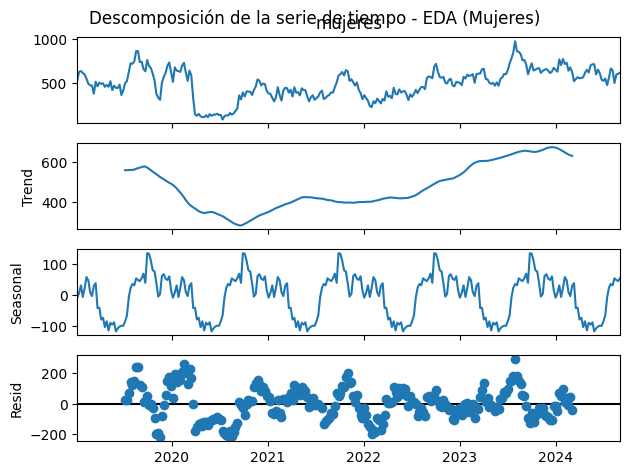

In [ ]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# Cargar el dataset y filtrar por "EDA" y la columna "mujeres"
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv("/content/drive/My Drive/MODELOS MONOGRAFIA/otrasinfeccionesMonografia.csv", sep=";")
data_eda_mujeres = data[data['tipo'] == 'EDA'][['fecha', 'mujeres']]
data_eda_mujeres['fecha'] = pd.to_datetime(data_eda_mujeres['fecha'], dayfirst=True)
data_eda_mujeres = data_eda_mujeres.sort_values(by='fecha')
data_eda_mujeres.set_index('fecha', inplace=True)

# Sección 1: Descomposición de la serie de tiempo
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(data_eda_mujeres['mujeres'], model='additive', period=52)  # Usando una periodicidad anual (52 semanas)
result.plot()
plt.suptitle("Descomposición de la serie de tiempo - EDA (Mujeres)")
plt.show()

In [ ]:
# Sección 2: Preprocesamiento de datos
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data_eda_mujeres)

# Crear secuencias de datos
def create_sequences(data, time_steps=1):
    x, y = [], []
    for i in range(len(data) - time_steps):
        x.append(data[i:(i + time_steps), 0])
        y.append(data[i + time_steps, 0])
    return np.array(x), np.array(y)

# Dividir los datos en entrenamiento (85%) y prueba (15%)
train_size = int(len(data_scaled) * 0.85)
train, test = data_scaled[:train_size], data_scaled[train_size:]

# Crear secuencias para entrenamiento y prueba
time_steps = 4
x_train, y_train = create_sequences(train, time_steps)
x_test, y_test = create_sequences(test, time_steps)

# Cambiar la forma de los datos para que sean compatibles con LSTM (samples, time_steps, features)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Sección 3: Construir el modelo LSTM
model = Sequential()
model.add(LSTM(units=5, return_sequences=True, input_shape=(time_steps, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=5, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=5))
model.add(Dropout(0.2))
#model.add(Dense(50, activation='relu'))
model.add(Dense(1))


# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Sección 4: Entrenar el modelo y graficar la pérdida (loss)
history = model.fit(x_train, y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.2208
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1888 
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1943 
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1673 
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1570
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1347 
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1045 
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0790 
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0641
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0605 
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0358
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0379
Epoch 13/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0409
Epoch 14/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0373
Epoch 15/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0461
Epoch 16/100
8/8 ━━━━━━━━━━━━━━━

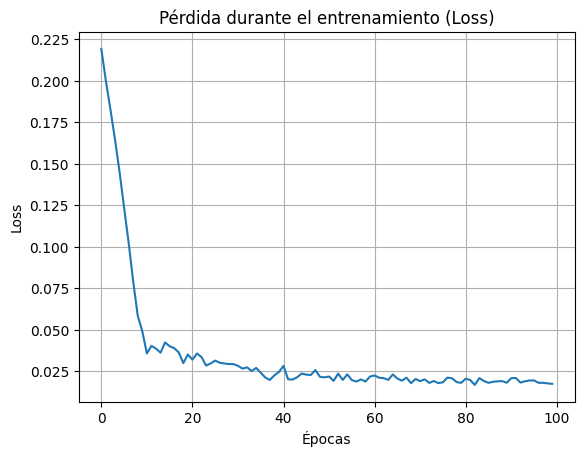

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
MAE en el conjunto de prueba: 58.66
RMSE en el conjunto de prueba: 71.55
MAPE en el conjunto de prueba: 9.32%
sMAPE en el conjunto de prueba: 9.59%


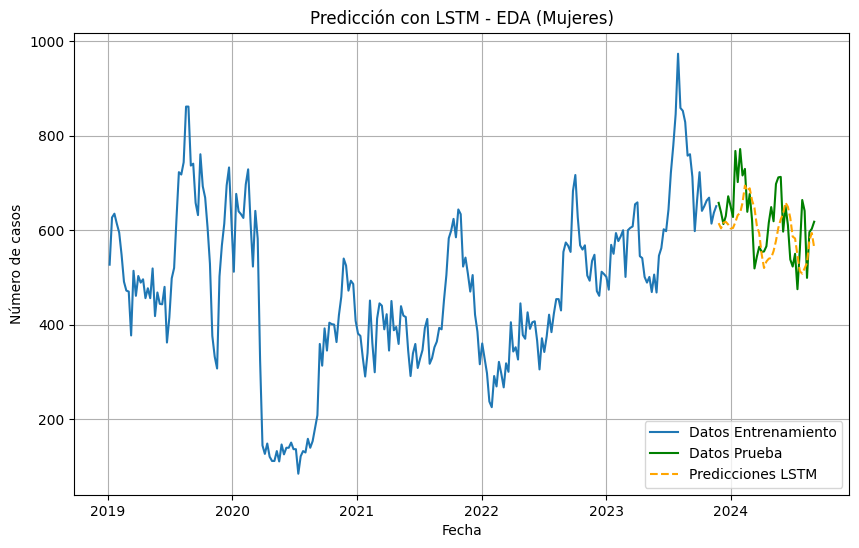

        Fecha  Reales   Predichos
0  2023-11-27   658.0  614.986023
1  2023-12-04   638.0  603.930664
2  2023-12-11   613.0  615.788940
3  2023-12-18   630.0  617.769714
4  2023-12-25   672.0  612.088013
5  2024-01-01   651.0  603.739197
6  2024-01-08   628.0  604.651306
7  2024-01-15   768.0  617.042542
8  2024-01-22   702.0  632.088684
9  2024-01-29   772.0  636.433838
10 2024-02-05   716.0  658.237305
11 2024-02-12   730.0  694.634705
12 2024-02-19   639.0  682.967529
13 2024-02-26   677.0  688.804199
14 2024-03-04   621.0  663.044312
15 2024-03-11   519.0  647.315735
16 2024-03-18   544.0  609.397522
17 2024-03-25   565.0  593.255859
18 2024-04-01   554.0  549.446167
19 2024-04-08   555.0  519.951111
20 2024-04-15   566.0  533.740906
21 2024-04-22   616.0  539.684082
22 2024-04-29   649.0  541.252686
23 2024-05-06   619.0  555.780457
24 2024-05-13   698.0  577.402710
25 2024-05-20   712.0  605.374146
26 2024-05-27   713.0  623.017578
27 2024-06-03   597.0  635.281616
28 2024-06-10 

In [ ]:
# Graficar el loss del entrenamiento
plt.plot(history.history['loss'])
plt.title('Pérdida durante el entrenamiento (Loss)')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# Sección 5: Realizar predicciones y desescalar
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train = scaler.inverse_transform([y_train])
y_test = scaler.inverse_transform([y_test])

# Sección 6: Evaluación de métricas MAE, RMSE, MAPE y sMAPE
mae_test = mean_absolute_error(y_test[0], test_predict[:, 0])
rmse_test = np.sqrt(mean_squared_error(y_test[0], test_predict[:, 0]))
mape_test = mean_absolute_percentage_error(y_test[0], test_predict[:, 0]) * 100  # Convertir a porcentaje
smape_test = 100 * np.mean(2 * np.abs(y_test[0] - test_predict[:, 0]) / (np.abs(y_test[0]) + np.abs(test_predict[:, 0])))

# Imprimir las métricas de evaluación
print(f'MAE en el conjunto de prueba: {mae_test:.2f}')
print(f'RMSE en el conjunto de prueba: {rmse_test:.2f}')
print(f'MAPE en el conjunto de prueba: {mape_test:.2f}%')
print(f'sMAPE en el conjunto de prueba: {smape_test:.2f}%')

# Sección 7: Graficar predicciones vs datos reales
plt.figure(figsize=(10, 6))
plt.plot(data_eda_mujeres.index[:train_size + time_steps], scaler.inverse_transform(data_scaled[:train_size + time_steps]), label='Datos Entrenamiento')
plt.plot(data_eda_mujeres.index[train_size + time_steps:], scaler.inverse_transform(data_scaled[train_size + time_steps:]), label='Datos Prueba', color='green')
plt.plot(data_eda_mujeres.index[train_size + time_steps:], test_predict, label='Predicciones LSTM', linestyle='--', color='orange')
plt.title(f'Predicción con LSTM - EDA (Mujeres)')
plt.xlabel('Fecha')
plt.ylabel('Número de casos')
plt.legend()
plt.grid(True)
plt.show()

# Comparación de los valores reales vs predicciones
comparison_df = pd.DataFrame({
    'Fecha': data_eda_mujeres.index[train_size + time_steps:],
    'Reales': y_test[0],
    'Predichos': test_predict[:, 0]
})

# Mostrar el dataframe comparativo
print(comparison_df)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
       Fecha  Predicciones
0 2024-09-03         538.0
1 2024-09-04         574.0
2 2024-09-05         570.0
3 2024-09-06         559.0
4 2024-09-07         537.0
5 2024-09-08         546.0
6 2024-09-09         539.0
7 2024-09-10         529.0


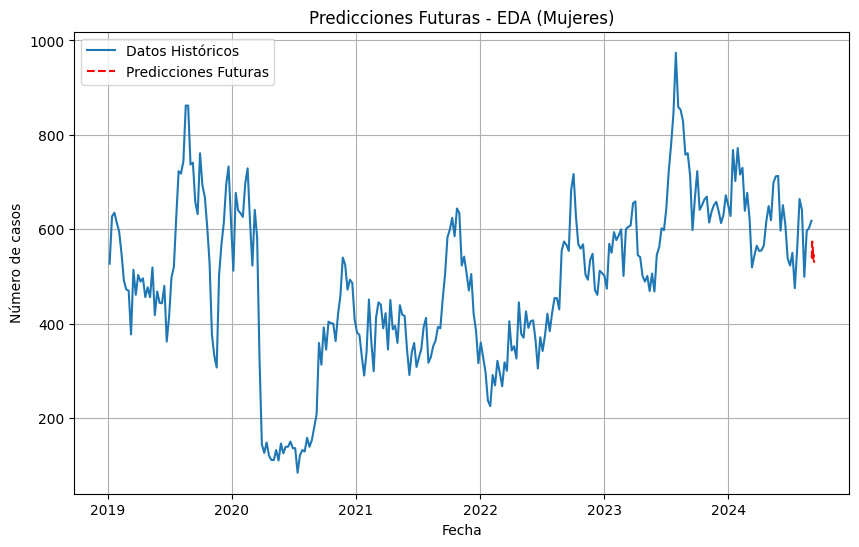

In [ ]:
# prompt: realiza 8 predicciones a futuro

# Sección 8: Predicciones futuras

# Preparar los datos para las predicciones futuras
last_data_points = data_scaled[-time_steps:]
future_predictions = []

for _ in range(8):  # Realizar 8 predicciones
    last_data_points_reshaped = last_data_points.reshape(1, time_steps, 1)
    next_prediction = model.predict(last_data_points_reshaped)
    future_predictions.append(next_prediction[0, 0])
    last_data_points = np.append(last_data_points[1:], next_prediction)

future_predictions = np.array(future_predictions)
future_predictions = (scaler.inverse_transform(future_predictions.reshape(-1, 1))).round()

# Crear fechas futuras
last_date = data_eda_mujeres.index[-1]
future_dates = pd.date_range(start=last_date + pd.DateOffset(1), periods=8)

# Crear el DataFrame de predicciones futuras
future_df = pd.DataFrame({
    'Fecha': future_dates,
    'Predicciones': future_predictions.flatten()
})

# Imprimir las predicciones
print(future_df)

# Graficar las predicciones futuras
plt.figure(figsize=(10, 6))
plt.plot(data_eda_mujeres.index, scaler.inverse_transform(data_scaled), label='Datos Históricos')
plt.plot(future_df['Fecha'], future_df['Predicciones'], label='Predicciones Futuras', linestyle='--', color='red')
plt.title('Predicciones Futuras - EDA (Mujeres)')
plt.xlabel('Fecha')
plt.ylabel('Número de casos')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Valores reales a futuro
real_values = np.array([890, 773, 734, 768, 621, 633, 581, 548])

# Suponiendo que 'future_df' contiene las predicciones del modelo
# Reemplaza esto con tu DataFrame real
# Ejemplo de future_df (reemplázalo con tu DataFrame real)
future_df = pd.DataFrame({
    'Predicciones': [538,574,570,559,537,546,539,529] #Reemplazar con los valores de tu prediccion
})

# Calcular las métricas
mae = np.mean(np.abs(real_values - future_df['Predicciones']))
rmse = np.sqrt(np.mean((real_values - future_df['Predicciones'])**2))
mape = np.mean(np.abs((real_values - future_df['Predicciones']) / real_values)) * 100
smape = 100/len(real_values) * np.sum(2 * np.abs(future_df['Predicciones'] - real_values) / (np.abs(real_values) + np.abs(future_df['Predicciones'])))


print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAPE: {mape:.2f}%')
print(f'sMAPE: {smape:.2f}%')

# Crear un DataFrame para comparar visualmente
comparison_df = pd.DataFrame({
    'Real': real_values,
    'Predicho': future_df['Predicciones']
})
comparison_df

MAE: 144.50
RMSE: 177.07
MAPE: 19.10%
sMAPE: 21.97%


,Real,Predicho
0,890,538
1,773,574
2,734,570
3,768,559
4,621,537
5,633,546
6,581,539
7,548,529


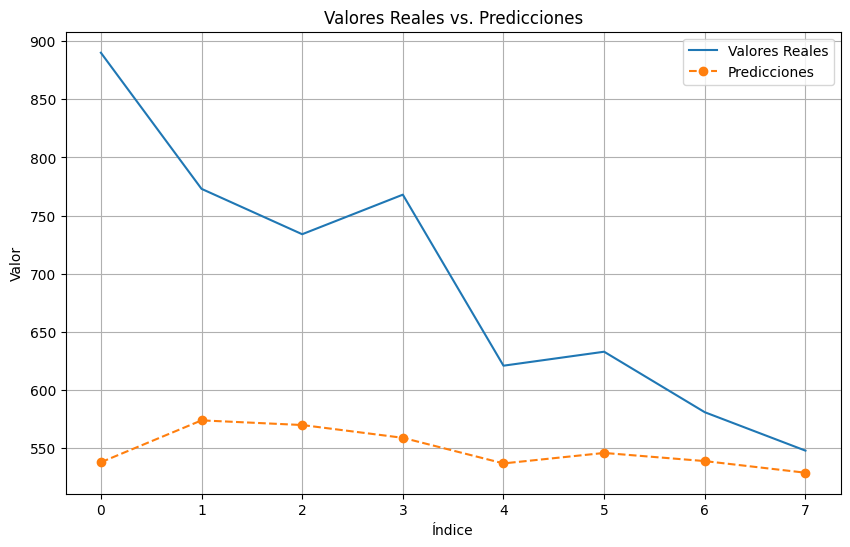

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(real_values, label='Valores Reales')
plt.plot(future_predictions, label='Predicciones', linestyle='--', marker = 'o')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.title('Valores Reales vs. Predicciones')
plt.legend()
plt.grid(True)
plt.show()